## SEAI 2021 - Python - Lab 1
# Intro to Python 

Vincenzo Nardelli - vincnardelli@gmail.com - https://github.com/vincnardelli

## Lab structure:
- Intro
- 1 - Matrix computation with NumPy
- 2 - Data manipulation and analysis with Pandas
- 3 - Graphs with Matplotlib and Seaborn
- Extra topic: Git and Github (with Niccolò Salvini)

Let's start from the basics!

In [1]:
3 + 5

8

In [2]:
12 / 7

1.7142857142857142

In [3]:
result = 3 + 5

In [4]:
result

8

In [5]:
print(result)

8


In [6]:
result = result * 3.1415
print(result)

25.132


In [7]:
vector = [1, 3, 8, 13]

In [8]:
vector * 3

[1, 3, 8, 13, 1, 3, 8, 13, 1, 3, 8, 13]

In [9]:
dict = {'a': 12,
        'b': 34,
        'c': 62,
        'd': 68,
        'e': 29}
dict

{'a': 12, 'b': 34, 'c': 62, 'd': 68, 'e': 29}

Unlike R, the basic version of Python does not allow operations between scalars and matrices. For this you need to convert the vector to numpy array.

The package functions must be called taking into account the library structure

In [10]:
import numpy as np

In [11]:
vector = np.array(vector)
vector

array([ 1,  3,  8, 13])

In [12]:
vector * 3

array([ 3,  9, 24, 39])

The procedure for the subset is similar to that of R but it must be taken into account that the numbering starts from 0 instead of 1.

In [13]:
vector[1]

3

In [14]:
vector[0]

1

Furthermore, in the case of multiple selection, the index starts from 0 (unlike R which starts from 1) and the second value representing the last element is NOT included in the subset (unlike R which is included).

In [15]:
vector[1:3]

array([3, 8])

In [16]:
vector[[False, True, True, False]]


array([3, 8])

In [17]:
vector < 3

array([ True, False, False, False])

In [18]:
vector[vector < 3]

array([1])

In [19]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
type(L[0])

int

Or, similarly, a list of strings:

In [21]:
L2 = []
for c in L:
    L2.append(str(c))
print(L2)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [22]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [23]:
type(L2[0])

str

Because of Python's dynamic typing, we can even create heterogeneous lists:

In [24]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

# 1 - Matrix computation with NumPy

- Creating arrays from Python listis
- Creating arrays from Scratch
- NumPy Standard Data Types
- Array Attributes
- Array Indexing
- Array Slicing
- Arithmetic Operations

NumPy brings the computational power of languages like C and Fortran to Python!

Why use NumPy? It's fast

- In a Python object, to allow the flexible types, each item in the list must contain its own type info, reference count, and other information.

- In a computational task we are in the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array.

The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:

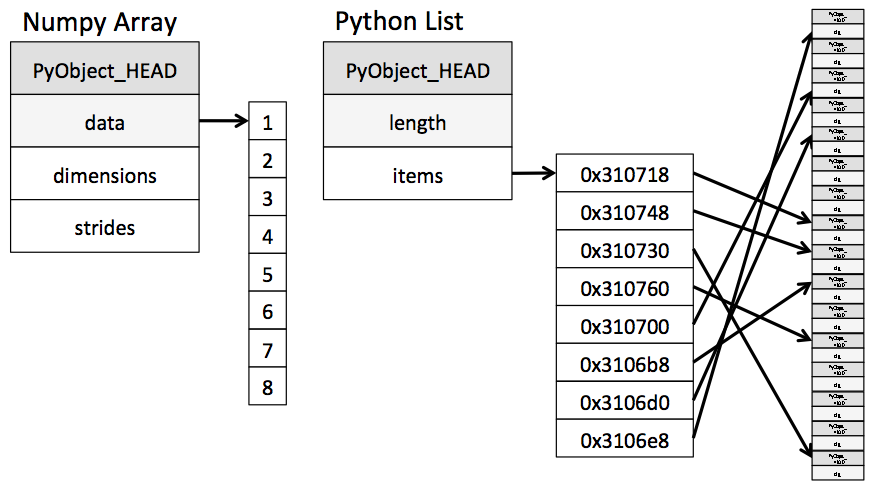

At the implementation level, the array essentially contains a single pointer to one contiguous block of data.

The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object.

Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type.
Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

In [25]:
import numpy as np

## Creating Arrays from Python Lists

In [26]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

In [27]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

In [28]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

In [29]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

## Creating Arrays from Scratch

Create a length-10 integer array filled with zeros

In [30]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Create a 3x5 floating-point array filled with ones

In [31]:
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Create an array filled with a linear sequence
Starting at 0, ending at 20, stepping by 2

In [32]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

Create an array of five values evenly spaced between 0 and 1

In [33]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Create a 3x3 array of normally distributed random values with mean 0 and standard deviation 1

In [34]:
np.random.normal(0, 1, (3, 3))

array([[ 0.10929925,  0.4472276 , -0.90143291],
       [ 0.72417091,  0.1095674 , -0.4777506 ],
       [-0.16828243, -0.79163834, -1.72378984]])

Create a 3x3 identity matrix

In [35]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## NumPy Standard Data Types

Because NumPy is built in C, the types will be familiar to users of C, Fortran, and other related languages.

In [36]:
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

## Array Attributes

One-dimensional array

In [37]:
np.random.seed(0)

x1 = np.random.randint(10, size=6) 
x1

array([5, 0, 3, 3, 7, 9])

Two-dimensional array

In [38]:
x2 = np.random.randint(10, size=(3, 4))
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

Three-dimensional array

In [39]:
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [40]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


Another useful attribute is the ``dtype``, the data type of the array (which we discussed previously in [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb)):

In [41]:
print("dtype:", x3.dtype)

dtype: int64


## Array Indexing

In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [42]:
x1

array([5, 0, 3, 3, 7, 9])

In [43]:
x1[0]

5

In [44]:
x1[4]

7

To index from the end of the array, you can use negative indices:

In [45]:
x1[-1]

9

In [46]:
x1[-2]

7

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [48]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [49]:
x2[0, 0]

3

In [50]:
x2[2, 0]

1

In [51]:
x2[2, -1]

7

Values can also be modified using any of the above index notation:

In [52]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [53]:
x1[0] = 3.14159  # this will be truncated!
x1

array([3, 0, 3, 3, 7, 9])

## Array Slicing

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

In [54]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

First five element

In [55]:
x[:5]

array([0, 1, 2, 3, 4])

Elements after index 5

In [56]:
x[5:] 

array([5, 6, 7, 8, 9])

middle sub-array

In [57]:
x[4:7]

array([4, 5, 6])

every other element

In [58]:
x[::2] 

array([0, 2, 4, 6, 8])

every other element, starting at index 1

In [59]:
x[1::2]

array([1, 3, 5, 7, 9])

A potentially confusing case is when the ``step`` value is negative.
In this case, the defaults for ``start`` and ``stop`` are swapped.
This becomes a convenient way to reverse an array:

In [60]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [61]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [62]:
x2[:2, :3]  # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [63]:
x2[:3, ::2]  # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

Finally, subarray dimensions can even be reversed together:

In [64]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

Accessing array rows and columns

One commonly needed routine is accessing of single rows or columns of an array.
This can be done by combining indexing and slicing, using an empty slice marked by a single colon (``:``):

In [65]:
print(x2[:, 0])  # first column of x2

[12  7  1]


In [66]:
print(x2[0, :])  # first row of x2

[12  5  2  4]


## Arithmetic Operations

In [68]:
a = np.array([1,2,3])
b = np.array([(1.5,2,3), (4,5,6)], dtype = float)

In [72]:
a + b

array([[2.5, 4. , 6. ],
       [5. , 7. , 9. ]])

In [73]:
a - b

array([[-0.5,  0. ,  0. ],
       [-3. , -3. , -3. ]])

In [74]:
a * b

array([[ 1.5,  4. ,  9. ],
       [ 4. , 10. , 18. ]])

In [75]:
a / b

array([[0.66666667, 1.        , 1.        ],
       [0.25      , 0.4       , 0.5       ]])

In [76]:
np.exp(a)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [77]:
np.log(a)

array([0.        , 0.69314718, 1.09861229])

In [84]:
c = np.array([1.5,2], dtype = float)
c

array([1.5, 2. ])

In [92]:
d = np.array([4,5], dtype = float)
d

array([4., 5.])

In [93]:
c.dot(d)

16.0

In [94]:
1.5*4+2*5

16.0

# 2 - Data manipulation and analysis with Pandas

[Pandas documentation](http://pandas.pydata.org/).

Pandas is a Python data analysis Library. The name is derived from the term "panel data". 

- The Pandas Series Object
- The Pandas DataFrame Object
- Construction DataFrame Objects
- Data loading
- Data indexing and selection
- Aggregation and grouping
- Simple aggregation
- GroupBy
- Aggregate, filter and transform

In [95]:
import pandas as pd

In [96]:
#pd.DataFrame?

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [97]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [98]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [99]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [100]:
data[1]

0.5

In [101]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [102]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [103]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [104]:
population['New York':'Illinois']

New York    19651127
Florida     19552860
Illinois    12882135
dtype: int64

In [105]:
population[2:5]

New York    19651127
Florida     19552860
Illinois    12882135
dtype: int64

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.

The ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.

DataFrame as a generalized NumPy array

A ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.

Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.

Here, by "aligned" we mean that they share the same index.

In [106]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [107]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [108]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [109]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [110]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

## Constructing DataFrame objects

From a single Series object

In [111]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.

In [112]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [113]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


From a two-dimensional NumPy array

In [114]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.652790,0.635059
b,0.995300,0.581850
c,0.414369,0.474698


## Data loading

In [115]:
path = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
path_xls = "https://github.com/pandas-dev/pandas/blob/master/doc/data/test.xls?raw=true"
test = pd.read_excel(path_xls)
test

,Unnamed: 0,A,B,C,D
0,2000-01-03,0.980269,3.685731,-0.364217,-1.159738
1,2000-01-04,1.047916,-0.041232,-0.161812,0.212549
2,2000-01-05,0.498581,0.731168,-0.537677,1.346270
3,2000-01-06,1.120202,1.567621,0.003641,0.675253
4,2000-01-07,-0.487094,0.571455,-1.611639,0.103469
5,2000-01-10,0.836649,0.246462,0.588543,1.062782
6,2000-01-11,-0.157161,1.340307,1.195778,-1.097007


In [117]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_largest_cities')[1]
df.head()

City[a] Country Skyline UN 2018 population estimates[b]  \
       City[a] Country Skyline UN 2018 population estimates[b]   
0        Tokyo   Japan     NaN                        37400068   
1        Delhi   India     NaN                        28514000   
2     Shanghai   China     NaN                        25582000   
3    São Paulo  Brazil     NaN                        21650000   
4  Mexico City  Mexico     NaN                        21581000   

          City proper[c]                            Metropolitan area[d]  \
              Definition      Population  Area(km2)           Population   
0  Metropolis prefecture  13,515,271[14]  2,191[14]       37,274,000[15]   
1           Capital City  16,753,235[16]       1484       29,000,000[17]   
2           Municipality  24,183,000[18]       6341                  NaN   
3           Municipality  12,252,023[19]       1521       21,734,682[20]   
4             City-state   9,209,944[21]       1485       21,804,515[21]   

              Urban area(Demographia)[12]            
    Area(km2)                  Population Area(km2)  
0  13,452[15]                  37977000.0  8,230[e]  
1   3,483[17]                  29617000.0  2,232[f]  
2         NaN                  22120000.0  4,068[g]  
3        7947                  22046000.0  3,116[h]  
4   7,866[22]                  20996000.0      2386

In [118]:
#df.to_csv("scraped_data.csv")
#df.to_excel("scraped_data.xlsx")

## Data Indexing and Selection

In [119]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [120]:
states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [121]:
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


Thus for array-style indexing, we need another convention.
Here Pandas again uses the ``loc``and ``iloc`` indexers mentioned earlier.

Using the ``iloc`` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the ``DataFrame`` index and column labels are maintained in the result:

In [122]:
states.iloc[:3, :2]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [123]:
states.loc[:'New York', :'area']

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


In [124]:
states.loc[states.density > 100, ['population', 'density']]

,population,density
New York,19651127,139.076746
Florida,19552860,114.806121


Additional indexing conventions

There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice.
First, while *indexing* refers to columns, *slicing* refers to rows:

In [125]:
states['Florida':'Illinois']

,population,area,density
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


Such slices can also refer to rows by number rather than by index:

In [126]:
states[1:3]

,population,area,density
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746


Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [127]:
states[states.density > 100]

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


## Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.
In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

Here we will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
It gives information on planets that astronomers have discovered around other stars (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command:

In [128]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [129]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

## Simple Aggregation in Pandas

In [130]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [131]:
ser.sum()

2.811925491708157

In [132]:
ser.mean()

0.5623850983416314

For a ``DataFrame``, by default the aggregates return results within each column:

In [133]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [134]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

By specifying the ``axis`` argument, you can instead aggregate within each row:

In [135]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [136]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.


A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation, is illustrated in this figure:

![split_apply_combine.png]( 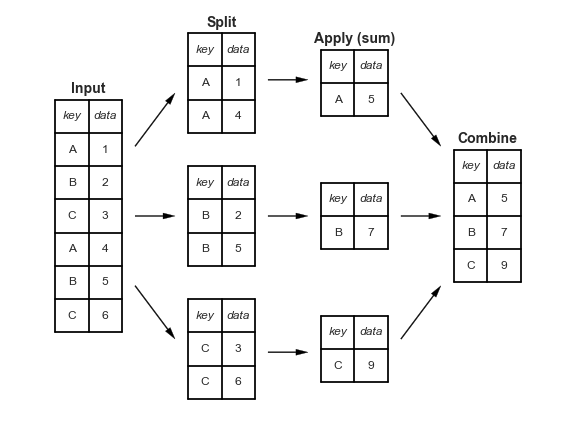)

This makes clear what the ``groupby`` accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The *combine* step merges the results of these operations into an output array.

In [137]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [138]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


The GroupBy object


In [139]:
planets.groupby('method')

In [140]:
planets.groupby('method')['orbital_period']

In [141]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

Dispatch methods

Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [142]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


## Aggregate, filter, transform

In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [143]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


Aggregation

We're now familiar with ``GroupBy`` aggregations with ``sum()``, ``median()``, and the like, but the ``aggregate()`` method allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.
Here is a quick example combining all these:

In [144]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [145]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [146]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [147]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [148]:
def filter_func(x):
    return x['data2'].std() > 4

df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

In [149]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


Example

As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:

In [150]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# 3 - Graphs with Matplotlib and Seaborn


## Matplotlib

https://matplotlib.org/stable/gallery/index.html

In [151]:
import matplotlib as mpl
import matplotlib.pyplot as plt

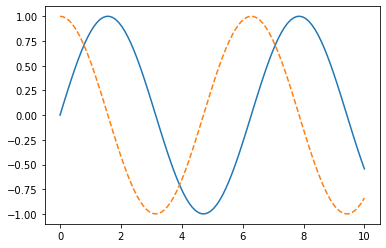

In [152]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [153]:
#fig.savefig('my_figure.png')

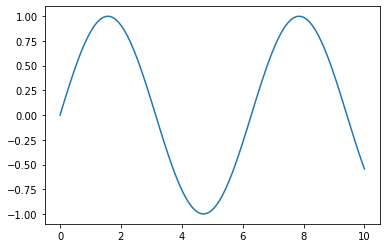

In [154]:
plt.plot(x, np.sin(x));

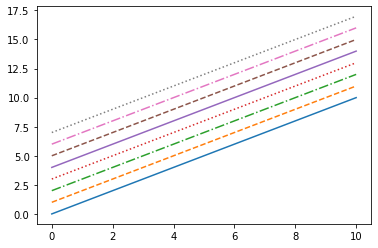

In [155]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

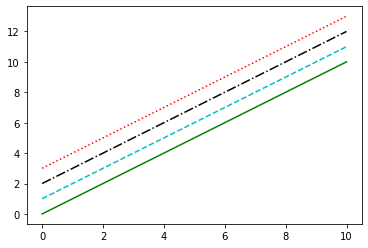

In [156]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

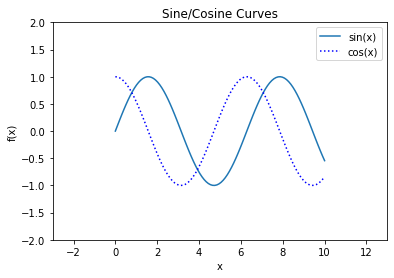

In [157]:
plt.plot(x, np.sin(x), label="sin(x)")
plt.plot(x, np.cos(x), ':b', label='cos(x)')

plt.xlim(-3, 13)
plt.ylim(-2, 2);
plt.title("Sine/Cosine Curves")
plt.xlabel("x")
plt.ylabel("f(x)");
plt.legend();

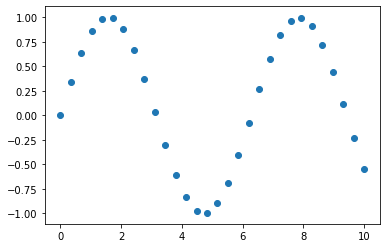

In [158]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, marker='o')

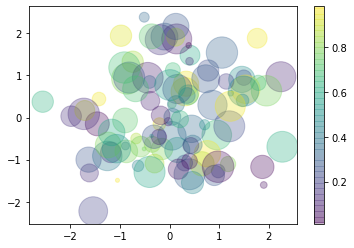

In [159]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();

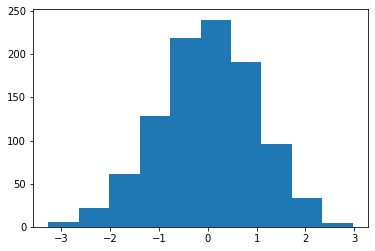

In [160]:
data = np.random.randn(1000)
plt.hist(data);

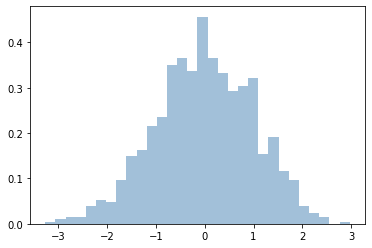

In [161]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

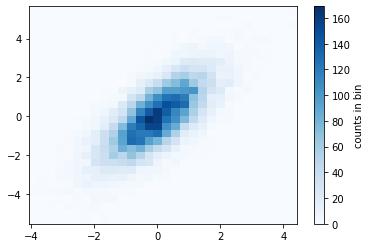

In [162]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Multiple plots

MATLAB-style Interface

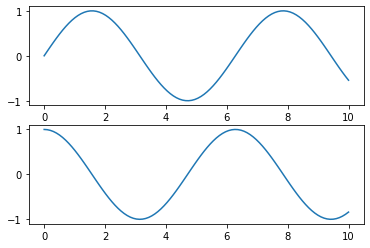

In [163]:
x = np.linspace(0, 10, 100)

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Object-oriented interface

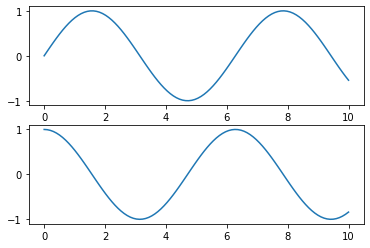

In [164]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Seaborn

https://seaborn.pydata.org/examples/index.html

In [165]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


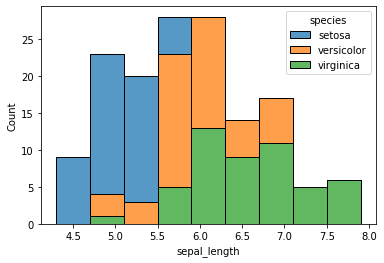

In [166]:
sns.histplot(data=iris, x="sepal_length", hue="species", multiple="stack");

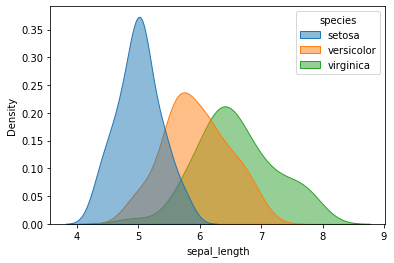

In [167]:
sns.kdeplot(data=iris, x="sepal_length", hue="species", shade=True, alpha=0.5);

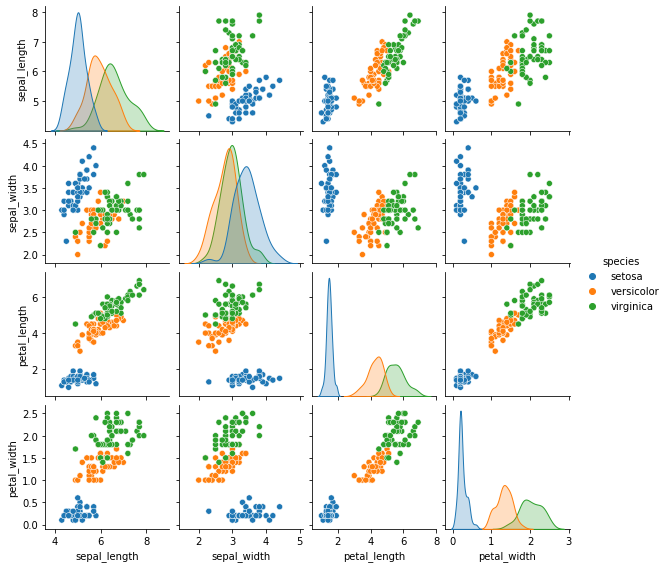

In [168]:
sns.pairplot(data=iris, hue='species', height=2);